### Install Packages

In [1]:
!pip install wrds
!pip install plotnine


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.10/py/lib/python3.10/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


### Import Libraries and User-Defined-Functions

In [2]:
import wrds
import pandas as pd
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import numpy as np
from plotnine import *
from milestone import analyze_country

In [3]:
conn = wrds.Connection(wrds_username='dssang')

KeyboardInterrupt: Interrupted by user

### Create country - stock exchange mapping table

In [3]:
exchg_dict = {
    '308':{'ExchangeName':'Chittagong', 'Country':'Bangladesh', 'Label':'Developing Country'},
    '314':{'ExchangeName':'Dacca', 'Country':'Bangladesh', 'Label':'Developing Country'},
    '309':{'ExchangeName':'Abidjan', 'Country':'Cote dIvoire', 'Label':'Developing Country'},
    '214':{'ExchangeName':'Nairobi', 'Country':'Kenya', 'Label':'Developing Country'},
    '214':{'ExchangeName':'Nairobi', 'Country':'Kenya', 'Label':'Developing Country'},
    '197':{'ExchangeName':'Lusaka', 'Country':'Zambia', 'Label':'Developing Country'},
    '166':{'ExchangeName':'Harare', 'Country':'Zimbabwe', 'Label':'Developing Country'},
    
    '106':{'ExchangeName':'Australian Stock Exchange', 'Country':'Australia', 'Label':'Developed Country'},
    '221':{'ExchangeName':'Nicosia', 'Country':'Cyprus', 'Label':'Developed Country'},
    '201':{'ExchangeName':'Madrid', 'Country':'Spain', 'Label':'Developed Country'},
    '209':{'ExchangeName':'Milan', 'Country':'Italy', 'Label':'Developed Country'},
    '251':{'ExchangeName':'Singapore', 'Country':'Singapore', 'Label':'Developed Country'}
}
exchg_df = pd.DataFrame(exchg_dict).T.reset_index().rename(columns={'index':'exchg'})

[Compustat Exchange Code](http://finabase.blogspot.com/2014/09/interantional-stock-exchange-codes-for.html)

### List of Factors to Feature Engineer
- Size
   - Market Capitalization
- Quality
   - Earnings
   - Asset
   - Revenue
   - Cash Flow
   - Operating-Income
- Value
   - PER (Price over Earnings Ratio)
   - PBR (Price over Book-value Ratio)
   - POR (Price over Operating-Income Ratio)
   - PCR (Price over Cash-Flow Ratio)
   - PSR (Price over Sales/Revenue Ratio)
- Yield
   - Dividend per Share
- Momentum
   - 1m Return
   - 6m Return
   - 1y Return
   - 2y Return
   - 3y Return
- Volatility
   - Daily Return 1m Standard Deviation
   - Daily Return 6m Standard Deviation
   - Daily Return 1y Standard Deviation
   - Daily Return 2y Standard Deviation
   - Daily Return 3y Standard Deviation
- Liquidity
   - 1m Transaction Amount
   - 3m Transaction Amount
   - 6m Transaction Amount
   - 1y Transaction Amount
   - 2y Transaction Amount
   - 3y Transaction Amount

### Analyze Country

In [4]:
result_df = pd.DataFrame()
for i in exchg_df.Country.drop_duplicates():
    print(f"## {i}")
    fit, summary_tbl = analyze_country(i, '2000-01-01', '2021-12-31', conn, exchg_df)
    result_df = pd.concat([result_df, summary_tbl.assign(country = lambda x: i)])

## Bangladesh
Reading Price Data
Reading Financial Statement Data
Feature Engineering - Size Factor
Feature Engineering - Quality Factor
Feature Engineering - Value Factor
Feature Engineering - Yield Factor
Feature Engineering - Momentum Factor
Feature Engineering - Volatility Factor
Feature Engineering - Liquidity Factor
Feature Engineering - Growth Factor
Merge Factors
Normalize Variables
Fit Regression
## Cote dIvoire
Reading Price Data
Reading Financial Statement Data
Feature Engineering - Size Factor
Feature Engineering - Quality Factor
Feature Engineering - Value Factor
Feature Engineering - Yield Factor
Feature Engineering - Momentum Factor
Feature Engineering - Volatility Factor
Feature Engineering - Liquidity Factor
Feature Engineering - Growth Factor
Merge Factors
Normalize Variables
Fit Regression
## Kenya
Reading Price Data
Reading Financial Statement Data
Feature Engineering - Size Factor
Feature Engineering - Quality Factor
Feature Engineering - Value Factor
Feature Engin

In [5]:
sig_factors = \
    pd.merge(exchg_df[['Country', 'Label']].drop_duplicates(), 
             pd.merge(
                 exchg_df[['Country']].drop_duplicates(), 
                 result_df.query("pvalue <= 0.10"), 
                 left_on="Country", 
                 right_on="country"), 
             on='Country', how='left')[['Country','factor','beta','pvalue','Label']]

In [6]:
sig_factors.loc[sig_factors.Label == 'Developing Country']

,Country,factor,beta,pvalue,Label
0,Bangladesh,por,-0.060206,0.013099,Developing Country
1,Bangladesh,daily_vol_1m,-0.109333,0.003569,Developing Country
2,Bangladesh,daily_vol_3m,0.111891,0.071276,Developing Country
3,Bangladesh,daily_vol_24m,0.202655,0.020115,Developing Country
4,Bangladesh,daily_vol_36m,-0.123436,0.077489,Developing Country
5,Bangladesh,operating_income_yoy,0.079520,0.000387,Developing Country
6,Cote dIvoire,daily_vol_1m,0.296641,0.000573,Developing Country
7,Cote dIvoire,momentum_1m,-0.245724,0.001256,Developing Country
8,Cote dIvoire,momentum_24m,0.251488,0.023905,Developing Country
9,Kenya,operating_income_yoy,0.099236,0.062283,Developing Country


In [8]:
sig_factors.loc[sig_factors.Label == 'Developed Country']

,Country,factor,beta,pvalue,Label
21,Australia,momentum_1m,-0.028870,0.005811,Developed Country
22,Australia,momentum_36m,-0.024894,0.036598,Developed Country
23,Cyprus,avg_transaction_amount_36m,-0.501323,0.028062,Developed Country
24,Spain,daily_vol_3m,0.158471,0.015241,Developed Country
25,Spain,daily_vol_6m,-0.214191,0.003270,Developed Country
26,Spain,daily_vol_12m,0.146221,0.036153,Developed Country
27,Spain,momentum_36m,0.146613,0.000193,Developed Country
28,Italy,daily_vol_12m,-0.121438,0.020041,Developed Country
29,Italy,momentum_6m,0.044135,0.079279,Developed Country
30,Italy,momentum_12m,0.057736,0.052956,Developed Country


In [10]:
print(sig_factors.loc[~sig_factors.factor.isnull()].groupby('Label').size())

Label
Developed Country     14
Developing Country    20
dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_fill_gradient2 could not recognise parameter `space`


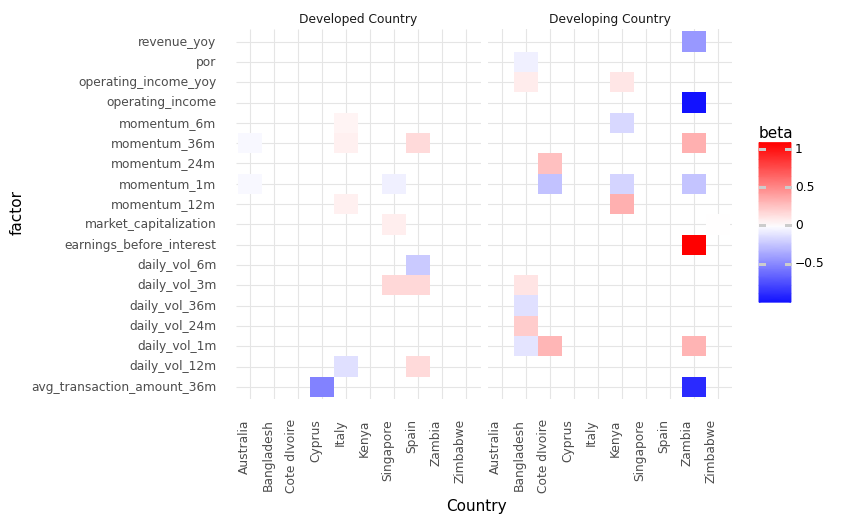

<ggplot: (301515764)>

In [11]:
sig_factors = sig_factors.assign(factor = np.where(sig_factors.Country == 'Zimbabwe', 'market_capitalization', sig_factors.factor))
sig_factors = sig_factors.assign(beta = np.where(sig_factors.Country == 'Zimbabwe', 0, sig_factors.beta))
(
    ggplot(sig_factors, aes(x='Country',y='factor',fill='beta')) +
    geom_tile() +
    facet_wrap('Label') +
    scale_fill_gradient2(
      low = "blue",
      mid = "white",
      high = "red",
      midpoint = 0,
      space = "Lab",
      aesthetics = "fill"
    ) +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6e0cd533-862b-451a-ac5c-be06b38b3cd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>